<a href="https://colab.research.google.com/github/dnvaishnavi/Air-Pollution-Monitoring/blob/main/AirPollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Load the dataset
df=pd.read_csv("//content/city_day.csv")
df.head()

,Unnamed: 0,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,Moderate
1,1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,Moderate
2,2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,Moderate
3,3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,Moderate
4,4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,Moderate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28818 entries, 0 to 28817
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28818 non-null  int64  
 1   City        28818 non-null  object 
 2   Date        28818 non-null  object 
 3   PM2.5       28818 non-null  float64
 4   PM10        28818 non-null  float64
 5   NO          28818 non-null  float64
 6   NO2         28818 non-null  float64
 7   NOx         28818 non-null  float64
 8   NH3         28818 non-null  float64
 9   CO          28818 non-null  float64
 10  SO2         28818 non-null  float64
 11  O3          28818 non-null  float64
 12  Benzene     28818 non-null  float64
 13  Toluene     28818 non-null  float64
 14  Xylene      28818 non-null  float64
 15  AQI         28818 non-null  float64
 16  AQI_Bucket  28818 non-null  object 
dtypes: float64(13), int64(1), object(3)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,Unnamed: 0,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000
mean,14408.500000,67.985880,118.385858,17.717199,28.387035,32.402493,23.785243,2.283698,14.622829,34.486761,3.262744,8.679457,3.082387,167.670483
std,8319.184365,59.869948,71.919066,21.546807,23.072579,29.588844,20.849256,6.794266,17.072870,19.892578,14.398141,17.223700,3.965561,130.094524
min,0.000000,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,7204.250000,32.450000,79.610000,6.270000,12.760000,14.550000,12.490000,0.540000,6.080000,20.960000,0.230000,1.210000,2.110000,88.000000
50%,14408.500000,58.830000,118.127103,11.570000,24.880000,27.570000,23.483476,0.960000,10.540000,34.491430,1.740000,6.740000,3.070128,140.000000
75%,21612.750000,73.010000,118.127103,17.660000,34.187500,36.127500,23.483476,1.740000,14.531977,42.740000,3.280840,8.700972,3.070128,182.000000
max,28817.000000,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


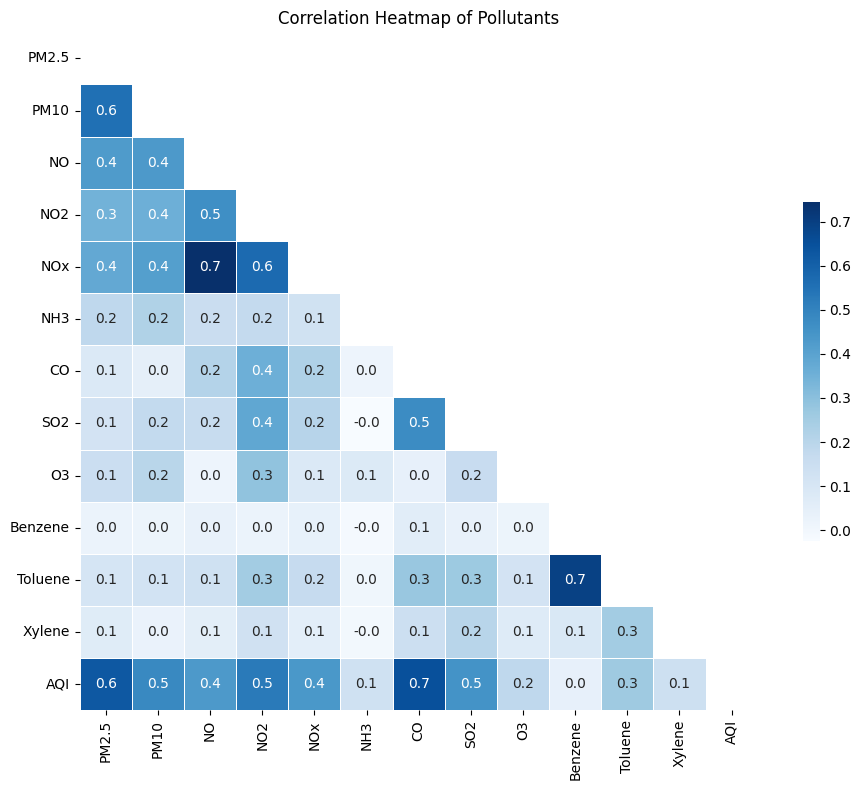

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".1f",  # to display one decimal place
    cmap='Blues',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.5})

plt.title("Correlation Heatmap of Pollutants")
plt.tight_layout()
plt.show()
# Dark blue / high positive values (e.g., 0.9): Strong positive correlation.

# Ex: If SO2 and AQI have a correlation of 0.9 → as SO2 increases, AQI also tends to increase.

# Light colors / low or negative values (e.g., 0.1, -0.2): Weak or negative correlation.

# Ex: If Xylene and Toluene have a correlation of -0.1 → there's a very weak inverse relation or none at all.

# The diagonal is always 1.0 (because a variable is always perfectly correlated with itself).


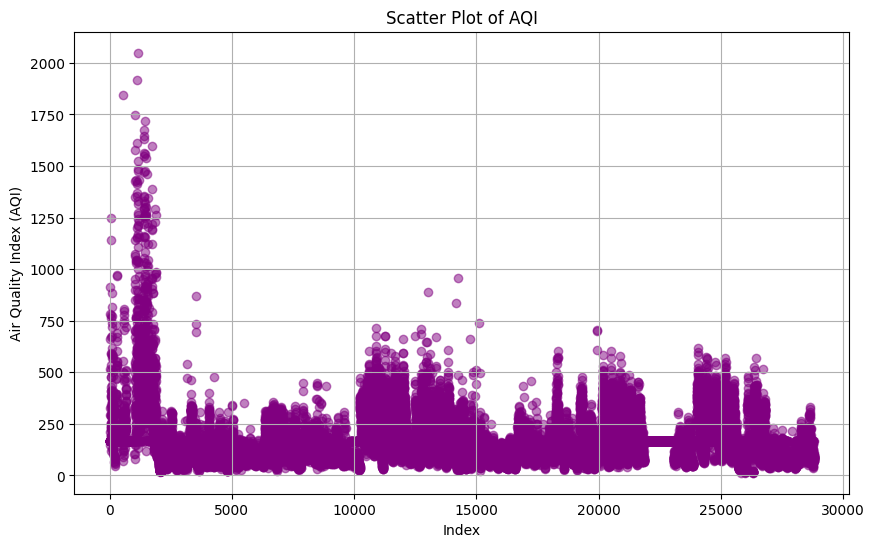

In [ ]:
import matplotlib.pyplot as plt
df = df.dropna(subset=["AQI"])

# Scatter plot of AQI vs index
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["AQI"], color='purple', alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Air Quality Index (AQI)")
plt.title("Scatter Plot of AQI")
plt.grid(True)
plt.show()


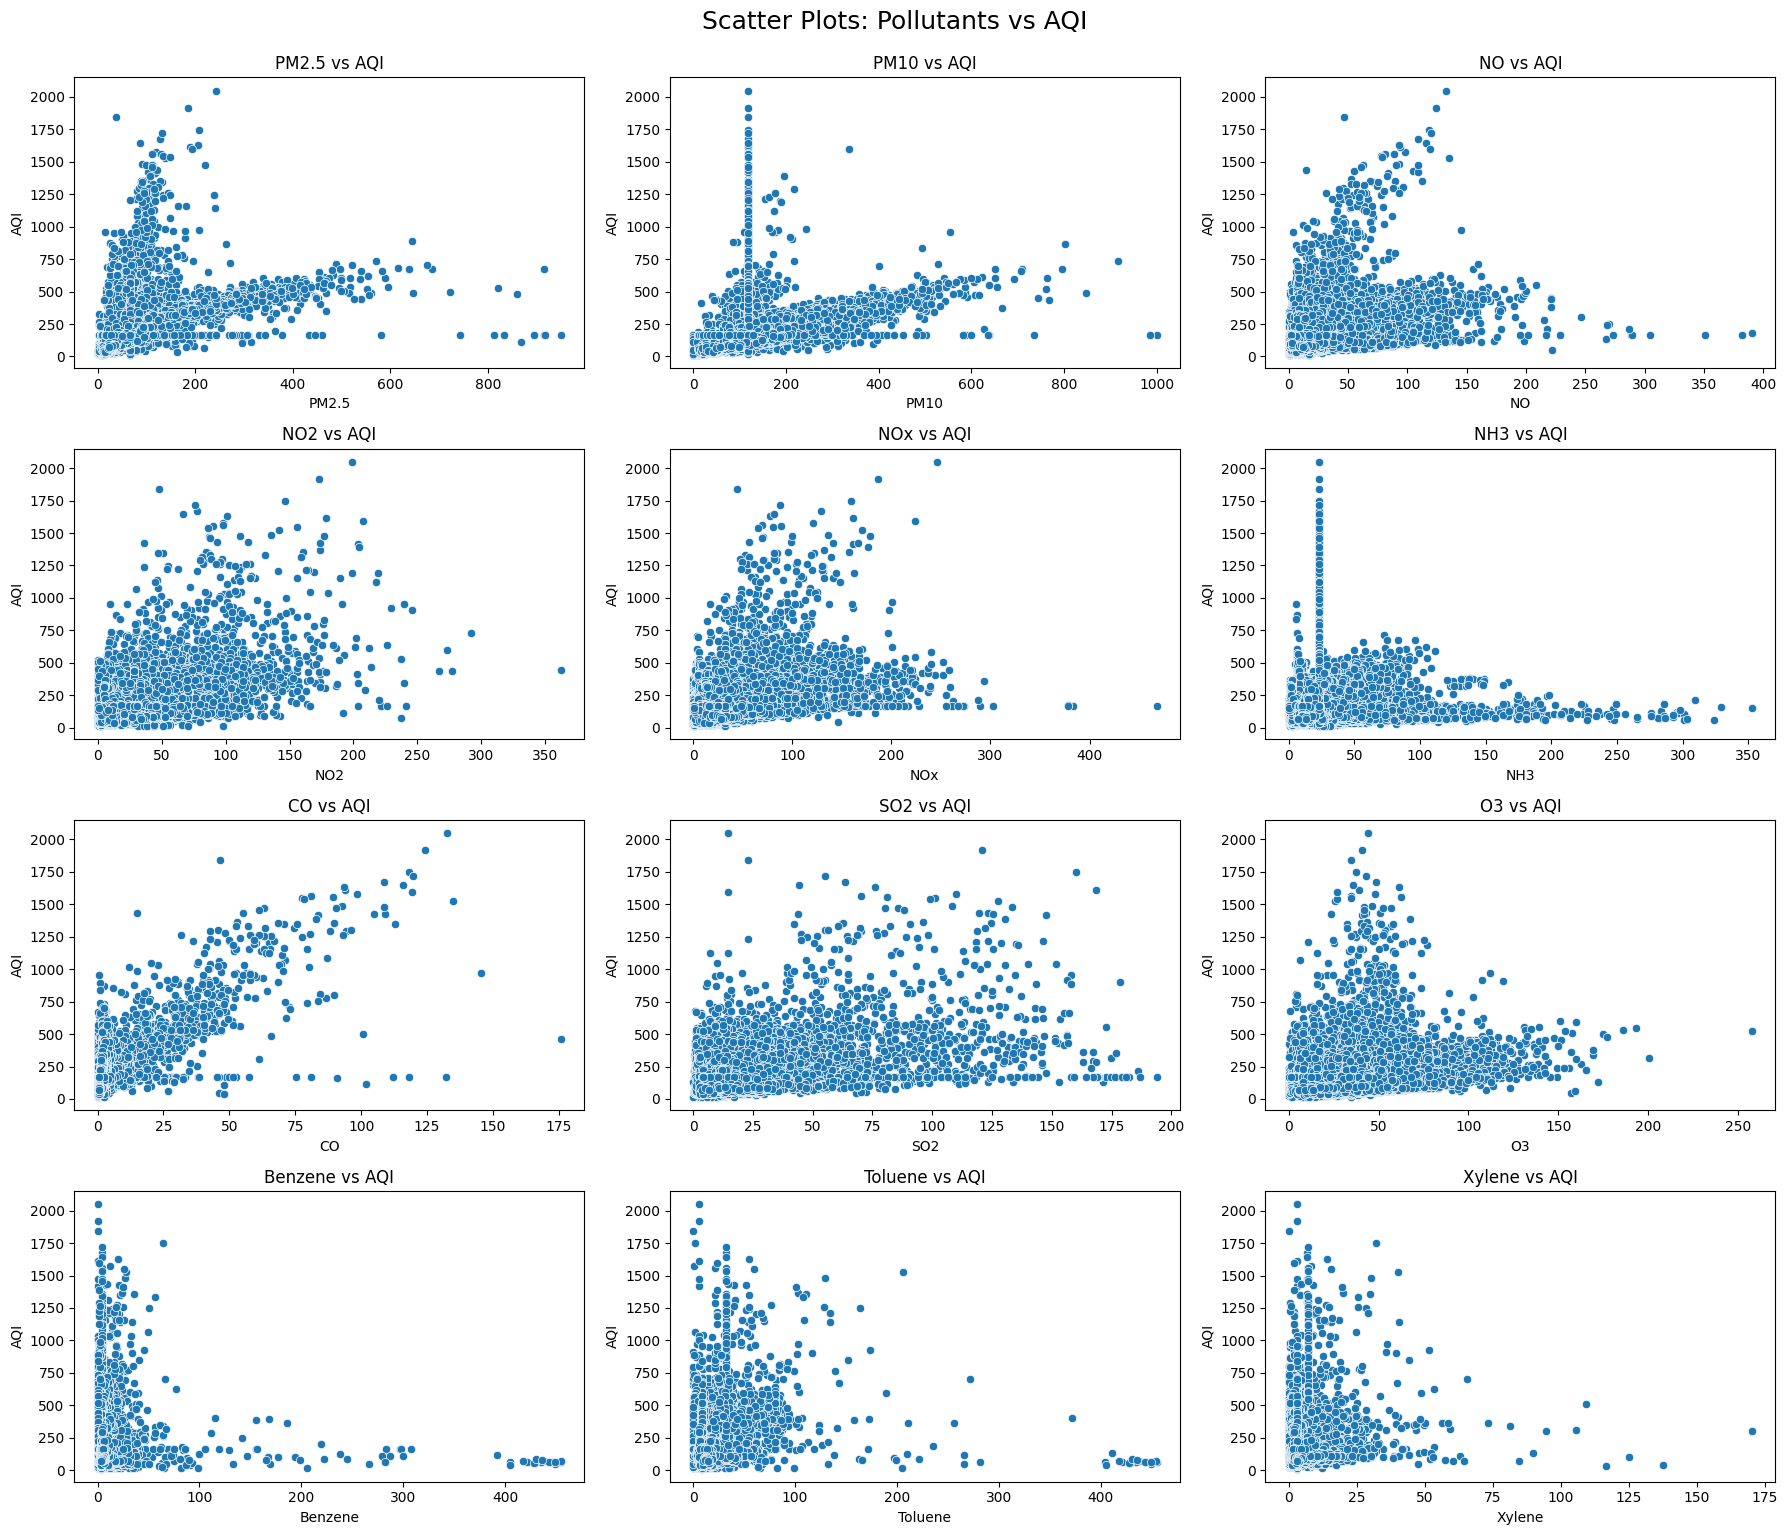

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features from the image
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Set figure size based on number of features
plt.figure(figsize=(18, 15))

# Create scatter plots
for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)  # 4 rows x 3 columns = 12 plots
    sns.scatterplot(data=df, x=feature, y='AQI')
    plt.title(f'{feature} vs AQI')

plt.tight_layout()
plt.suptitle("Scatter Plots: Pollutants vs AQI", fontsize=18, y=1.02)
plt.show()


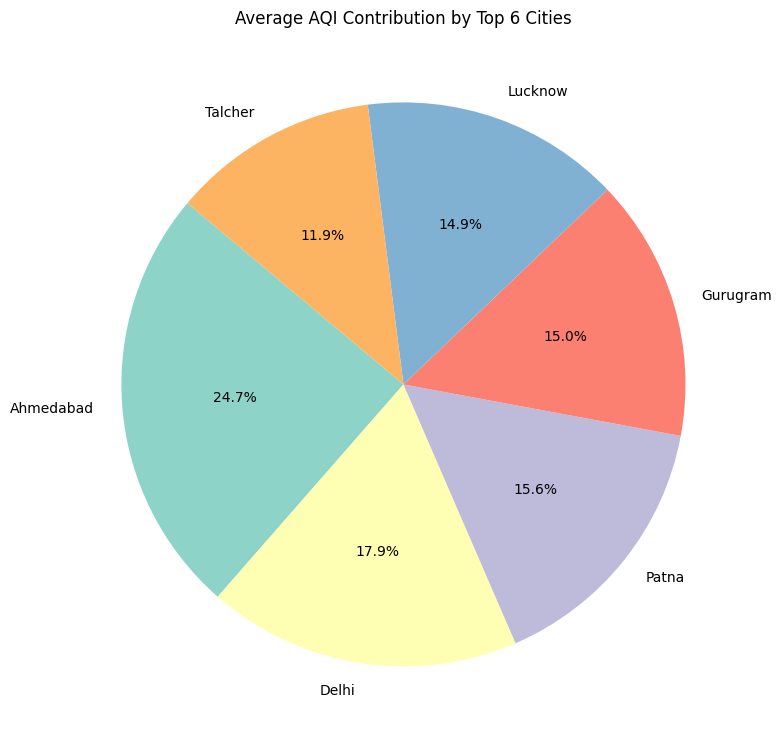

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by city and calculate average AQI
city_avg_aqi = df.groupby('City')['AQI'].mean().dropna()

# Sort by highest average AQI and take top 6 cities
top_cities_aqi = city_avg_aqi.sort_values(ascending=False).head(6)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_cities_aqi,
    labels=top_cities_aqi.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title("Average AQI Contribution by Top 6 Cities")
plt.tight_layout()
plt.show()


In [ ]:
df['AQI_Bucket'].value_counts()


,count
AQI_Bucket,
Moderate,13165
Satisfactory,7956
Poor,2741
Very Poor,2322
Severe,1338
Good,1295
Satisfa,1


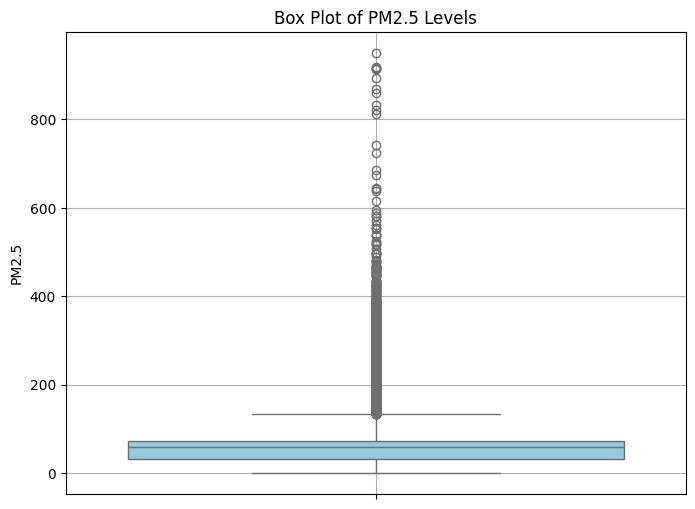

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df["PM2.5"], color="skyblue")
plt.title("Box Plot of PM2.5 Levels")
plt.ylabel("PM2.5")
plt.grid(True)
plt.show()


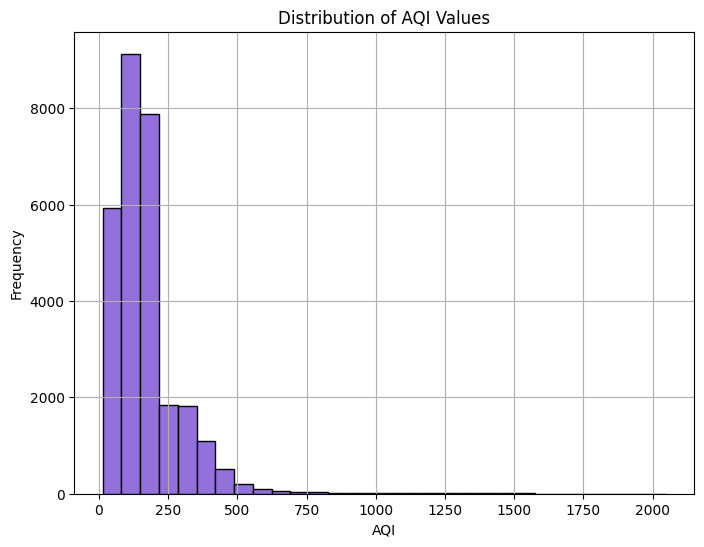

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df["AQI"].dropna(), bins=30, color='mediumpurple', edgecolor='black')
plt.title("Distribution of AQI Values")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


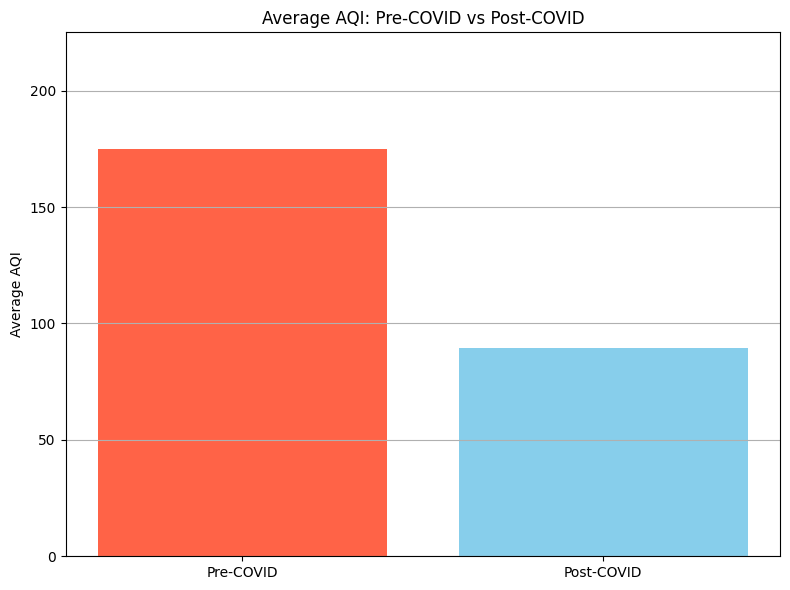

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Define date ranges
pre_covid = df[df['Date'] < '2020-03-24']
post_covid = df[df['Date'] >= '2020-03-24']

# Compute mean AQI
pre_covid_avg = pre_covid['AQI'].mean()
post_covid_avg = post_covid['AQI'].mean()

# Plot comparison
plt.figure(figsize=(8, 6))
plt.bar(['Pre-COVID', 'Post-COVID'], [pre_covid_avg, post_covid_avg], color=['tomato', 'skyblue'])
plt.title("Average AQI: Pre-COVID vs Post-COVID")
plt.ylabel("Average AQI")
plt.ylim(0, max(pre_covid_avg, post_covid_avg) + 50)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
df1 = df.copy()
df1['Pollution content'] = df1['PM2.5']+df1['PM10']+df1['NO']+df1['NO2']+df1['NOx']+df1['NH3']+df1['CO']+ df1['SO2']+df1['O3']+df1['Benzene']+df1['Toluene']+df1['Xylene']
df1 = df1.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28818 entries, 0 to 28817
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   City               28818 non-null  object        
 1   Date               28818 non-null  datetime64[ns]
 2   AQI                28818 non-null  float64       
 3   AQI_Bucket         28818 non-null  object        
 4   Pollution content  28818 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 1.1+ MB


In [ ]:
encoder = LabelEncoder()
df1.columns = df1.columns.str.strip()

 # Fit the encoder to your target variable first
encoder.fit(df['AQI_Bucket'])  # Assuming 'AQI_Bucket' is your target
 # Now you can access encoder.classes_
for idx, class_label in enumerate(encoder.classes_):
     print(f"{idx} -> {class_label}")
df1.head()

0 -> Good
1 -> Moderate
2 -> Poor
3 -> Satisfa
4 -> Satisfactory
5 -> Severe
6 -> Very Poor


,City,Date,AQI,AQI_Bucket,Pollution content
0,Ahmedabad,2015-01-01,166.463581,Moderate,407.291157
1,Ahmedabad,2015-01-02,166.463581,Moderate,314.711157
2,Ahmedabad,2015-01-03,166.463581,Moderate,378.081157
3,Ahmedabad,2015-01-04,166.463581,Moderate,319.151157
4,Ahmedabad,2015-01-05,166.463581,Moderate,419.761157


In [ ]:
encoder = LabelEncoder()
df1.columns = df1.columns.str.strip()
for col in df1.select_dtypes(include=['object']).columns:
  df1[col] = encoder.fit_transform(df[col])
df1.head()




,City,Date,AQI,AQI_Bucket,Pollution content
0,0,2015-01-01,166.463581,1,407.291157
1,0,2015-01-02,166.463581,1,314.711157
2,0,2015-01-03,166.463581,1,378.081157
3,0,2015-01-04,166.463581,1,319.151157
4,0,2015-01-05,166.463581,1,419.761157


In [ ]:
#Feature selection
X = df.drop(columns=['AQI_Bucket'])
y = df['AQI_Bucket'] #Target feature

In [ ]:
#Splitting Train andd test data(80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#initializing the model
scaler = StandardScaler()

# Impute NaN values with the mean of each column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # You can change the strategy if needed

# Select only numeric features for imputation
numeric_features = X_train.select_dtypes(include=np.number).columns

X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]

# Perform imputation on numeric features only
X_train_imputed = imputer.fit_transform(X_train_numeric)
X_test_imputed = imputer.transform(X_test_numeric)

# Convert the imputed arrays back to DataFrames
X_train_imputed = pd.DataFrame(X_train_imputed, columns=numeric_features, index=X_train.index)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=numeric_features, index=X_test.index)

# If you have categorical features that need to be handled:
# 1. One-hot encode or label encode them separately.
# 2. Concatenate the encoded categorical features with the imputed numeric features.

X_train = scaler.fit_transform(X_train_imputed) # Scale the imputed numeric features
X_test = scaler.transform(X_test_imputed)

In [ ]:
#Training model using radial (Non-Linear) function
svm_model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model_rbf.fit(X_train, y_train)
# Make predictions
y_pred = svm_model_rbf.predict(X_test)
# Evaluate model performance
accuracy = accuracy_score(y_test,y_pred)
print(f"Model Accuracy rbf:{accuracy:.4f}")


Model Accuracy rbf:0.9488


In [ ]:
###########---Polynomial kernel---##############

# Training model using polynomial kernel
svm_model_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svm_model_poly.fit(X_train, y_train)

# Make predictions
y_pred_poly = svm_model_poly.predict(X_test)

# Evaluate model performance
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Model Accuracy polynomial: {accuracy_poly:.4f}")

Model Accuracy polynomial: 0.8614


In [ ]:
##########----Sigmoid Kernel----############

# Training model using sigmoid kernel
svm_model_sigmoid = SVC(kernel='sigmoid', C=1.0, gamma='scale', random_state=42)
svm_model_sigmoid.fit(X_train, y_train)

# Make predictions
y_pred_sigmoid = svm_model_sigmoid.predict(X_test)

# Evaluate model performance
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print(f"Model Accuracy sigmoid: {accuracy_sigmoid:.4f}")


Model Accuracy sigmoid: 0.6473


In [ ]:
from sklearn.metrics import classification_report

# Get the unique classes in y_test
unique_classes = np.unique(y_test)

# Assuming 'AQI_Bucket' is in your original df
# and has not been transformed with LabelEncoder yet
#target_names = encoder.classes_  # Get class names directly from the encoder
target_names = df['AQI_Bucket'].unique() # Get unique class names from the original column
# If y_test is numeric due to previous encoding:
target_names = [str(name) for name in target_names]
# Sort target_names to match the order of unique_classes
target_names = sorted(target_names, key=lambda x: list(unique_classes).index(x) if x in list(unique_classes) else float('inf'))
# Select only target_names that are in unique_classes
target_names = [name for name in target_names if name in list(unique_classes)]
#Generate the classification report
y_pred = svm_model_rbf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Good       0.97      0.72      0.83       259
    Moderate       0.97      0.98      0.98      2679
        Poor       0.96      0.89      0.92       562
Satisfactory       0.93      0.97      0.95      1571
      Severe       0.92      0.89      0.91       255
   Very Poor       0.87      0.94      0.90       438

    accuracy                           0.95      5764
   macro avg       0.94      0.90      0.91      5764
weighted avg       0.95      0.95      0.95      5764



In [ ]:
### SVM from Reduced features From heat map #####
# Check for high correlations between features (≥ 0.8), to avoid redundancy:
# NO2 & NOx = 0.7 yes (moderate, not too high)
# CO is highly correlated with AQI, but not strongly with other top features —yes
# Toluene & Benzene = 0.7 — but both are weakly correlated with AQI->no

selected_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2']
target = 'AQI_Bucket'

# Step 2: Split data into features and target
X = df[selected_features]
y = df1[target]

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train RBF SVM model
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Step 6: Predict and evaluate
y_pred = svm_rbf.predict(X_test_scaled)

# Step 7: Evaluation metrics
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score #Import mean_squared_error and r2_score
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"RBF SVM Accuracy: {accuracy:.2f}")

# You can also use a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

print(f"RBF SVM MSE: {rmse:.2f}")
print(f"RBF SVM R² Score: {r2:.2f}")


RBF SVM Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.72      0.13      0.22       259
           1       0.84      0.83      0.83      2679
           2       0.73      0.56      0.64       562
           4       0.70      0.85      0.77      1571
           5       0.80      0.80      0.80       255
           6       0.74      0.78      0.76       438

    accuracy                           0.77      5764
   macro avg       0.75      0.66      0.67      5764
weighted avg       0.78      0.77      0.76      5764

RBF SVM MSE: 2.04
RBF SVM R² Score: 0.35


In [ ]:
#########Linear regression

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing AQI
df = df.dropna(subset=["AQI"])

# Separate features and target
X = df.drop("AQI", axis=1)
y = df["AQI"]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

# Preprocessing pipeline: one-hot encode categoricals + scale numericals
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), X.select_dtypes(include=["float64", "int64"]).columns.difference(categorical_cols))
    ]
)

# Build the full pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1471.7079603687334
R^2 Score: 0.9023777706336381


In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Build the XGBoost pipeline
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        n_estimators=300,    # Number of trees
        learning_rate=0.05,  # Smaller learning rate
        max_depth=4,         # Depth of trees
        subsample=0.8,       # Random subset of data for each tree
        colsample_bytree=0.8, # Random subset of features
        random_state=42,
        objective='reg:squarederror'  # Important for regression
    ))
])

# Fit the model
xgb_pipeline.fit(X_train, y_train)

# Predict
y_pred = xgb_pipeline.predict(X_test)

# Evaluate
print("XGBoost MSE:", mean_squared_error(y_test, y_pred))
print("XGBoost R² Score:", r2_score(y_test, y_pred))



XGBoost MSE: 687.8742526692218
XGBoost R² Score: 0.9543715058438192


In [ ]:
### suitable for linear svm from scatter plots #####
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Features and target
selected_features = ['CO', 'PM2.5', 'PM10']
X = df[selected_features]
y = df['AQI']

# Drop rows with NaNs
X = X.dropna()
y = y.loc[X.index]

# Scaling features (important for SVMs)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear SVM (regression)
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# Predictions
y_pred = svm_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_like = 1 - mse / y_test.var()

# Output
print("Linear SVM Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Accuracy-like Metric: {accuracy_like:.2%}")



Linear SVM Results:
Mean Squared Error (MSE): 3111.37
R² Score: 0.79
Accuracy-like Metric: 79.10%


<Figure size 2000x1000 with 0 Axes>

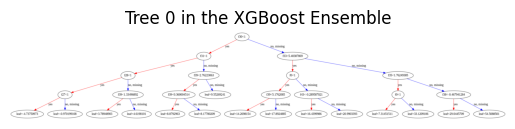

<Figure size 1000x600 with 0 Axes>

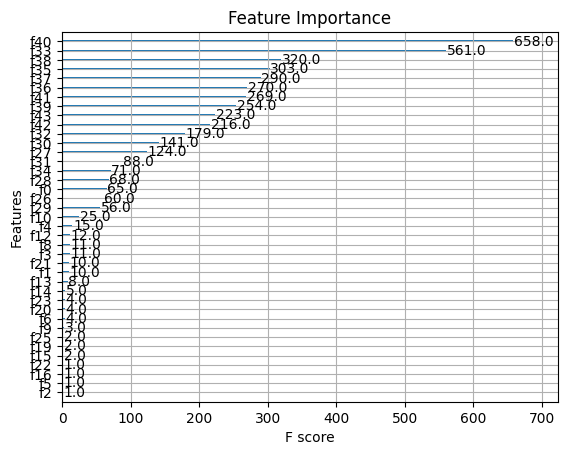

In [ ]:
from xgboost import plot_tree, plot_importance
import matplotlib.pyplot as plt

# Extract the trained XGBoost model (not the pipeline)
xgb_model = xgb_pipeline.named_steps['regressor']

# Plot the first tree (tree index 0)
plt.figure(figsize=(20, 10))
plot_tree(xgb_model, num_trees=0)
plt.title("Tree 0 in the XGBoost Ensemble")
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model)
plt.title("Feature Importance")
plt.show()
